# Luminosity dependency of reconstruction error

In [1]:
import getpass
import h5py
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import numpy as np
import pandas as pd
import pickle

from tqdm import tqdm

In [2]:
%matplotlib inline

matplotlib.rcParams["figure.figsize"] = (16, 8)

In [4]:
# Get permission to access EOS (Insert your NICE password)

os.system("echo %s | kinit" % getpass.getpass())

········


0

In [48]:
# Make ROC_curve

from sklearn.metrics import auc, roc_curve, roc_auc_score                          

def get_roc_curve(label, scores, names):
    """Generates ROC Curves for a given array"""
    fig, ax = plt.subplots()
    
    for i in range(len(scores)):
        fpr, tpr, thresholds = roc_curve(label, scores[i])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr,
                 tpr,
                 linewidth=3,
                 #linestyle=line_styles[0],
                 label=("%s AUC: %s" % (names[i], round(roc_auc, 3))))
        
    plt.legend(prop={'size': 20})
    plt.ylabel("Sensitivity (TPR)", fontsize=20)
    plt.xlabel("Fall-out (TNR)", fontsize=20)
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.grid()
    plt.title('ROC curves for different types of activation functions on JetHT', fontsize=20)
    plt.show();

In [11]:
files_dir_01 = '/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01/'
files_dir_08 = '/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split08/'

files_dir = files_dir_01

ae_pred = pickle.load(open(files_dir + "ae_pred.p", "rb"))
# ae_pred_no_reg = pickle.load(open(files_dir + "ae_pred_no_reg.p", "rb"))
ms_scores = pickle.load(open(files_dir + "ms_scores.p", "rb"))
rf_scores = pickle.load(open(files_dir + "rf_scores.p", "rb"))
true_labels = pickle.load(open(files_dir + "true_labels.p", "rb"))
luminosity = pickle.load(open(files_dir + "luminosity.p", "rb"))
# X_test = pickle.load(open(files_dir + "x_test.p", "rb"))

true_labels = true_labels[0]
ms_scores = ms_scores[0]
rf_scores = rf_scores[0]

In [12]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_softmax/"

ae_error_softmax = pickle.load(open(files_dir + "ae_error.p", "rb"))

In [13]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_elu/"

ae_error_elu = pickle.load(open(files_dir + "ae_error.p", "rb"))

In [14]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_selu/"

ae_error_selu = pickle.load(open(files_dir + "ae_error.p", "rb"))

In [15]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_softplus/"

ae_error_softplus = pickle.load(open(files_dir + "ae_error.p", "rb"))

In [16]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_softsign/"

ae_error_softsign = pickle.load(open(files_dir + "ae_error.p", "rb"))

In [17]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_relu/"

ae_error_relu = pickle.load(open(files_dir + "ae_error.p", "rb"))

In [18]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_sigmoid/"

ae_error_sigmoid = pickle.load(open(files_dir + "ae_error.p", "rb"))

In [19]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_hard_sigmoid/"

ae_error_hard_sigmoid = pickle.load(open(files_dir + "ae_error.p", "rb"))

In [20]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_tanh/"

ae_error_tanh = pickle.load(open(files_dir + "ae_error.p", "rb"))

In [21]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/lumi_dep/split01_linear/"

ae_error_linear = pickle.load(open(files_dir + "ae_error.p", "rb"))

In [22]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/batch_norm/"

ae_error_prelu_batch_norm = pickle.load(open(files_dir + "ae_error.p", "rb"))

In [23]:
files_dir = "/eos/user/t/tkrzyzek/autoencoder/visualization/"

# ae_pred_cleaned = pickle.load(open(files_dir + "ae_pred.p", "rb"))
ae_error_cleaned = pickle.load(open(files_dir + "ae_error.p", "rb"))
# y_test_cleaned = pickle.load(open(files_dir + "y_test.p", "rb"))

In [24]:
def get_error_df(X_test, predictions, mode="allmean", n_highest = 100):
    
    if mode == "allmean":
        return np.mean(np.power(X_test - predictions, 2), axis=1)
    
    elif mode == "topn":
        temp = np.partition(-np.power(X_test - predictions, 2), n_highest)
        result = -temp[:,:n_highest]
        return np.mean(result, axis=1)
    
    elif mode == "perobj":
        mses = []
        for l in legend:
            mse = np.mean(
                np.power(X_test[:,l["start"]:l["end"]] - predictions[:,l["start"]:l["end"]], 2),
                axis=1)
            mses.append(mse)
     
        return np.maximum.reduce(mses)

In [25]:
%timeit
ae_scores = get_error_df(X_test, ae_pred, mode="topn")
ae_scores_no_reg = get_error_df(X_test, ae_pred_no_reg, mode="topn")

NameError: name 'X_test' is not defined

In [32]:
names = [#"PReLU", 
#          "Autoencoder wo regularization",
         "PReLU cleaned input",
#          "PReLU w/ batch normalization",
         "softmax",
         "elu",
         "selu",
         "softplus",
         "softsign",
         "relu",
         "tanh",
         "sigmoid",
         "hard_sigmoid",
         "linear",
         "Mean square", 
         "Random forest"]

In [27]:
inliers = len(X_test[true_labels == 0])
outliers = len(X_test[true_labels == 1])

NameError: name 'X_test' is not defined

In [ ]:
ae_scores.shape

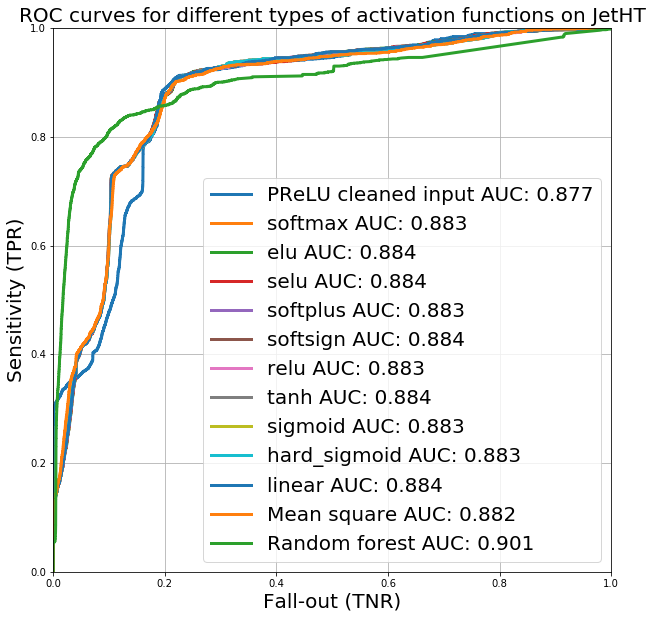

In [49]:
plt.rcParams['figure.figsize'] = [10, 10]

# print("Good lumis:", inliers)
# print("Bad lumis:", outliers)
# print("Ratio of bad lumis:", outliers/len(true_labels))
get_roc_curve(true_labels, 
#               [ae_scores, 
#                ae_scores_no_reg, 
               [ae_error_cleaned,
#                ae_error_prelu_batch_norm,
               ae_error_softmax, 
               ae_error_elu,
               ae_error_selu,
               ae_error_softplus,
               ae_error_softsign,
               ae_error_relu,
               ae_error_tanh,
               ae_error_sigmoid,
               ae_error_hard_sigmoid,
               ae_error_linear,
               ms_scores, 
               rf_scores],
              names)

In [23]:
# Save for later
FIRST_LUMI = 130947

# Index from zero
luminosity = luminosity.reset_index(drop=True)

In [24]:
def print_lumis():
    lumi_df = pd.DataFrame({'luminosity': luminosity,
                           'true_label': true_labels})
    
    print(lumi_df[start:end].to_string())

In [25]:
def pred_vs_feature(y_val, x_val, y_class, y_name="", x_name="", selected=[], linear=False,
                    limit=False):
    '''
    Plots two arbitrary values agains each other.
    '''
    df = pd.DataFrame({'y_val': y_val,
                       'x_val': x_val,
                       'y_class': y_class})

    groups = df.groupby('y_class')
    fig, ax = plt.subplots()

    for name, group in groups:
        ax.plot(group.x_val, 
                group.y_val,
                color="red" if name == 1 else "blue",
                marker='o',
                ms=2,
                linestyle='',
                label= "Anomaly" if name == 1 else "Normal")

    for i in selected:
        ax.plot(x_val[i],
                y_val[i],
                color="green",
                marker='o',
                ms=4,
                linestyle='')
                 
    ax.legend()
    if not linear:
        ax.set_yscale('log')
    if limit:
        plt.xlim([limit[0], limit[1]])
    plt.grid()
    plt.ylabel(y_name)
    plt.xlabel(x_name)
    plt.show()

# Luminosity across time

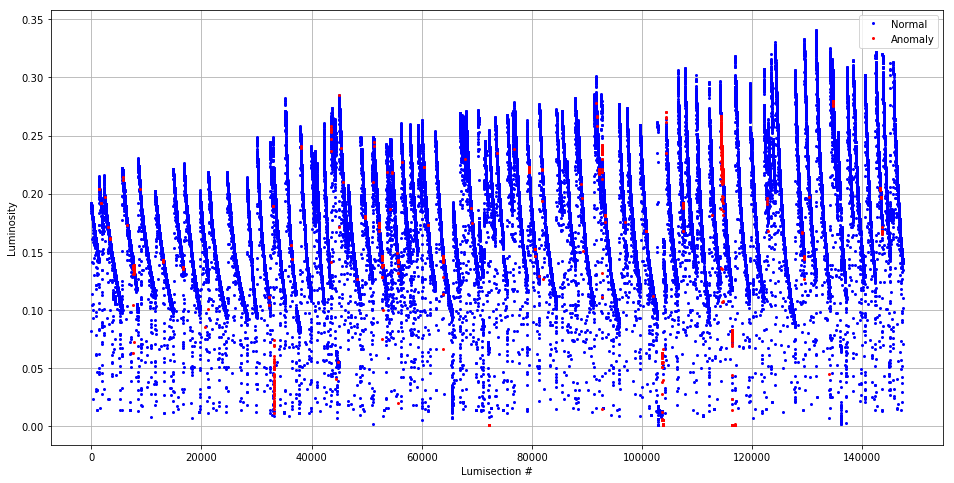

In [26]:
pred_vs_feature(luminosity, range(len(true_labels)), true_labels, "Luminosity", 
                "Lumisection #", linear=True)

# Reconstruction error across time

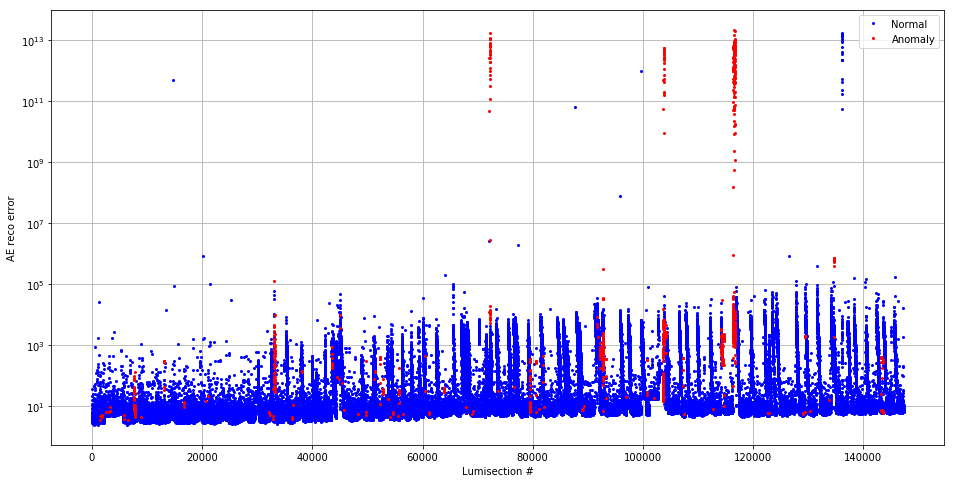

In [27]:
pred_vs_feature(ae_scores, range(len(true_labels)), true_labels, "AE reco error", 
                "Lumisection #")

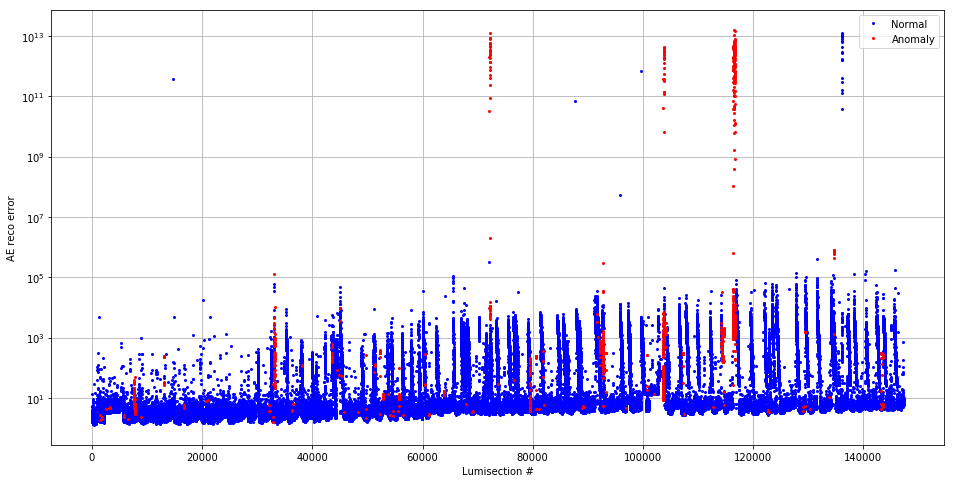

In [28]:
pred_vs_feature(ae_scores_no_reg, range(len(true_labels)), true_labels, "AE reco error", 
                "Lumisection #")

## Let's try to select lumisections range of the bad lumis cluster. Selected lumisections are marked in green.

In [29]:
begin = 1850
end = 2150

lumis_range = range(begin, end)

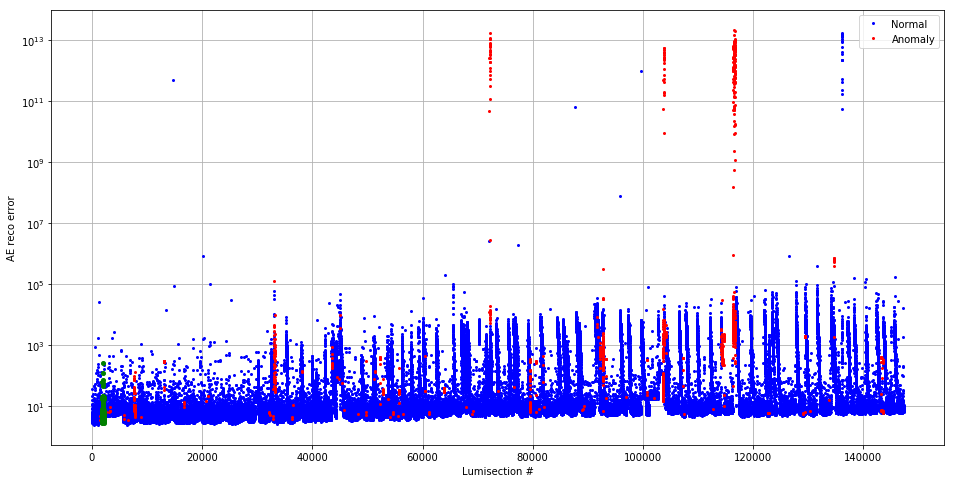

In [30]:
pred_vs_feature(ae_scores, range(len(true_labels)), true_labels, "AE reco error", 
                "Lumisection #", selected=lumis_range)

## Selected lumisections' luminosity (again in green)

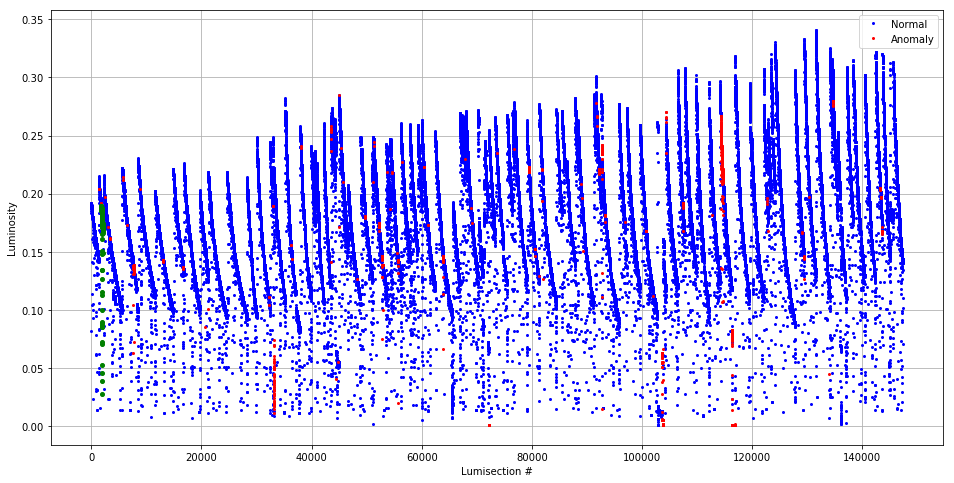

In [31]:
pred_vs_feature(luminosity, range(len(true_labels)), true_labels, "Luminosity", 
                "Lumisection #", linear=True, selected=lumis_range)

## Zoom in to the selected range:

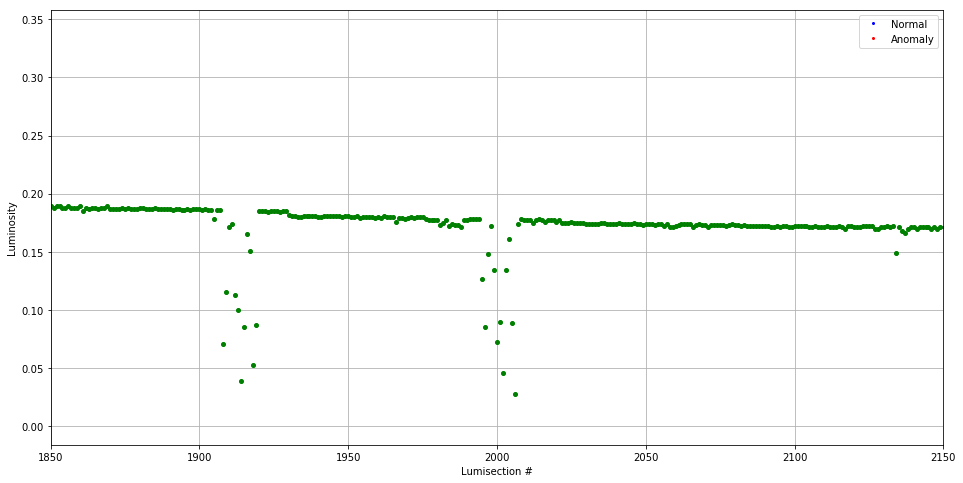

In [32]:
pred_vs_feature(luminosity, range(len(true_labels)), true_labels, "Luminosity", 
                "Lumisection #", linear=True, selected=lumis_range, limit=(begin, end))

# Histogram of luminosity of the selected lumisections

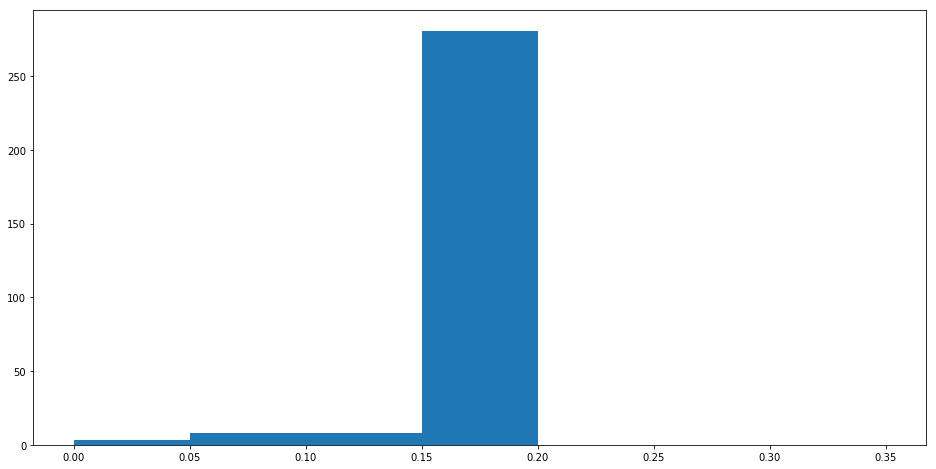

In [33]:
plt.hist(luminosity[begin:end], bins=np.arange(0, 0.4, 0.05))
plt.show()

# Reconstruction error vs luminosity

## This is plot of AE reconstruction error vs luminosity (the 'banana' in Filip's presentation)

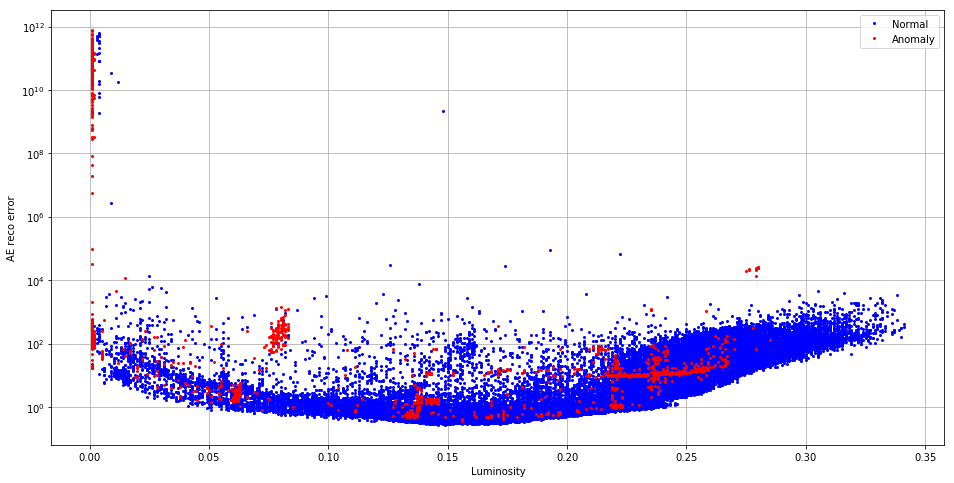

In [34]:
pred_vs_feature(ms_scores, luminosity, true_labels, "AE reco error", "Luminosity")

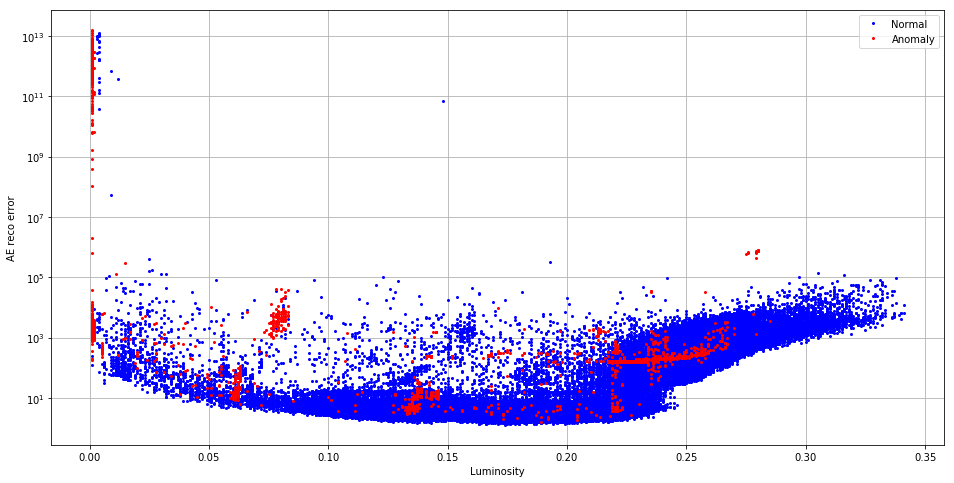

In [35]:
pred_vs_feature(ae_scores_no_reg, luminosity, true_labels, "AE reco error", "Luminosity")

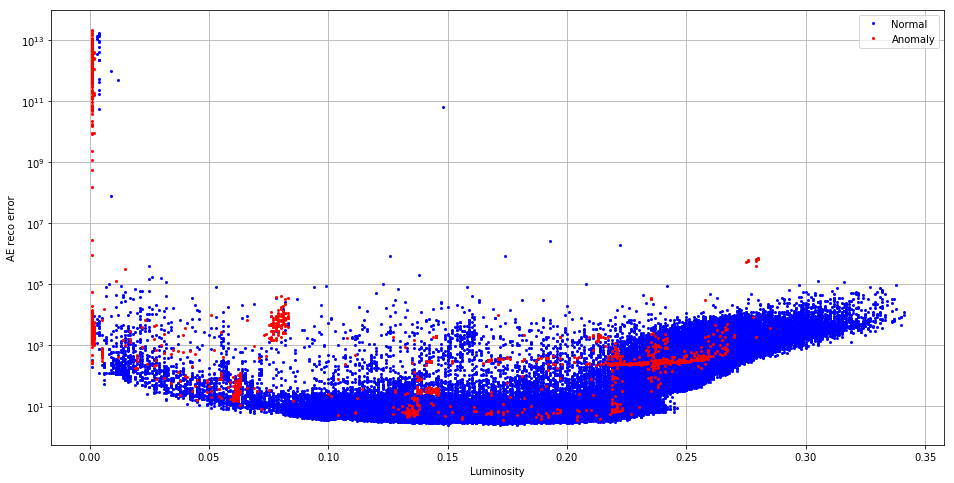

In [36]:
pred_vs_feature(ae_scores, luminosity, true_labels, "AE reco error", "Luminosity")

## ... with the cluster selected above marked in green

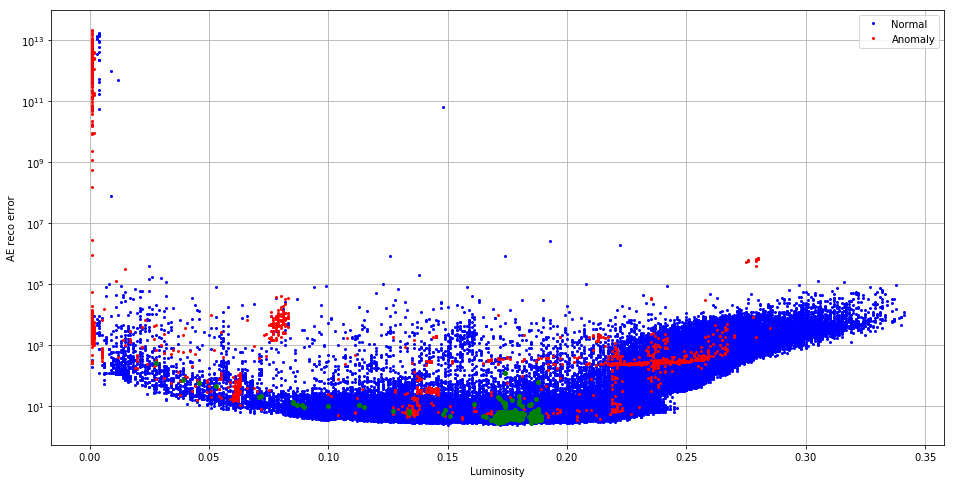

In [37]:
pred_vs_feature(ae_scores, luminosity, true_labels, "AE reco error", "Luminosity",
               lumis_range)

In [38]:
STEP = 0.05
#SAMPLE_SIZE = 2377
SAMPLE_SIZE=100

features_good = []
features_bad = []

def plot_mean_features(X, y):
    
    lower_bounds = np.arange(0, 0.35, STEP)
    
    for i in lower_bounds:
        data_filtered = data[(data['inst_lumi'] >= i) & (data['inst_lumi'] <= i+STEP)]
        print(i, "-", i+STEP)
        
        print("Dataset size:", len(data_filtered))
        X = data_filtered.iloc[:, 0:2806]
        X_good = X[y == 0]
        X_bad = X[y == 1]
        print("Good samples:", len(X_good))
        print("Bad samples:", len(X_bad))
        
        if len(X_bad) == 0:
            continue
        
        sample_good = X_good.sample(SAMPLE_SIZE)
        bad_sample = X_bad.sample(SAMPLE_SIZE)
        
        good_mean = abs(np.mean(sample_good, axis=0))
        bad_mean = abs(np.mean(bad_sample, axis=0))
        
        good_median = abs(np.median(sample_good, axis=0))
        bad_median = abs(np.median(bad_sample, axis=0))
        
        print("GOOD lumi abs mean of mean of features:", np.mean(good_mean))
        print("BAD  lumi abs mean of mean of features:", np.mean(bad_mean))
        print("===============================================================")
        print("GOOD lumi abs median of mean of features:", np.median(good_mean))
        print("BAD  lumi abs median of mean of features:", np.median(bad_mean))
        print("===============================================================")
        print("GOOD lumi abs mean of median of features:", np.mean(good_median))
        print("BAD  lumi abs mean of median of features:", np.mean(bad_median))
        print("===============================================================")
        print("GOOD lumi abs median of median of features:", np.median(good_median))
        print("BAD  lumi abs median of median of features:", np.median(bad_median))
    
        fig, (ax1, ax2) = plt.subplots(2, sharex=True)
        
        ax1.plot(np.array([i for i in range(len(bad_mean))]),
                 bad_mean,
                 color="red",
                 linestyle='-',
                 ms=2,
                 marker='o')
                 
        ax1.plot(np.array([i for i in range(len(good_mean))]),
                 good_mean,
                 color="green",
                 linestyle='-',
                 ms=2,
                 marker='o')
        
        ax2.plot(np.array([i for i in range(len(bad_median))]),
                 bad_median,
                 color="red",
                 linestyle='-',
                 ms=2,
                 alpha=0.9,
                 marker='o')
                 
        ax2.plot(np.array([i for i in range(len(good_median))]),
                 good_median,
                 color="green",
                 linestyle='-',
                 alpha=0.9,
                 ms=2,
                 marker='o')
        
        ax1.set_title("Mean")
        ax2.set_title("Median")
        
        #plt.xlim([0, 100])
        #plt.ylim([-5, 5])
        plt.ylabel("Value")
        plt.xlabel("Feature #")
        plt.show()
        
        fig2, (ax3, ax4) = plt.subplots(2, sharex=True)
        
        ax3.hlines(np.mean(good_mean), 
                   ax1.get_xlim()[0], 
                   ax1.get_xlim()[1], 
                   colors="#16ff02", 
                   zorder=100, 
                   label='GOOD lumi abs mean of mean')
        
        ax3.hlines(np.mean(bad_mean), 
                   ax1.get_xlim()[0], 
                   ax1.get_xlim()[1], 
                   colors="#ff0000", 
                   zorder=100, 
                   label='BAD  lumi abs mean of mean')
        
        ax3.hlines(np.median(good_mean), 
                   ax1.get_xlim()[0], 
                   ax1.get_xlim()[1], 
                   colors="#005611", 
                   zorder=100, 
                   label='GOOD lumi abs median of mean')
        
        ax3.hlines(np.median(bad_mean), 
                   ax1.get_xlim()[0], 
                   ax1.get_xlim()[1], 
                   colors="#560000", 
                   zorder=100, 
                   label='BAD  lumi abs median of mean')
        
        ax4.hlines(np.mean(good_median), 
                   ax1.get_xlim()[0], 
                   ax1.get_xlim()[1], 
                   colors="#16ff02", 
                   zorder=100, 
                   label='GOOD lumi abs mean of median')
        
        ax4.hlines(np.mean(bad_median), 
                   ax1.get_xlim()[0], 
                   ax1.get_xlim()[1], 
                   colors="#ff0000", 
                   zorder=100, 
                   label='BAD  lumi abs mean of median')
        
        ax4.hlines(np.median(good_median), 
                   ax1.get_xlim()[0], 
                   ax1.get_xlim()[1], 
                   colors="#005611", 
                   zorder=100, 
                   label='GOOD lumi abs median of median')
        
        ax4.hlines(np.median(bad_median), 
                   ax1.get_xlim()[0], 
                   ax1.get_xlim()[1], 
                   colors="#560000", 
                   zorder=100, 
                   label='BAD  lumi abs median of median')
        
        #ax3.set_ylim([0, 1.5])
        #ax4.set_ylim([0, 1.5])
        ax3.legend()
        ax4.legend()
    
plot_mean_features(X, y)

NameError: name 'X' is not defined